### Descripción del conjunto de datos


El siguiente dataset contiene la información clínica de pacientes con insuficiencia cardíaca. Se cuentan con un total de 299 datos.

Las columnas presentadas en el data-set son:

| Atributo               | Tipo                  | Descripción                                               |
|------------------------|-----------------------|-----------------------------------------------------------|
| Edad                   | Numérico discreto|                                                           |
| Anemia                 | Cualitativo nominal |                                                           |
| Creatinina Fosfoquinasa| Numérico continuo| Cantidad de dicha enzima en (mcg/L)                      |
| Diabetes               | Cualitativo nominal |                                                           |
| Fracción de eyección   | Numérico continuo| Se refiere al porcentaje de sangre que sale del corazón en cada contracción |
| Presión arterial alta  | Cualitativo nominal |                                                           |
| Plaquetas              | Numérico continua | Cantidad en sangre (kiloplaquetas/mL)                    |
| Suero de creatinina    | Numérico continuo | Cantidad en sangre (mg/dL)                               |
| Suero de sodio         | Numérico continuo | Cantidad en sangre (mEq/L)                                |
| Sexo                   | Cualitativo nominal |                                                           |
| Fumador                   | Cualitativo nominal|                                                           |
| Tiempo                   | Numérico continuo|                                                           |
| Muerte                   | Cualitativo nominal|      

### Exploracion de los datos
Limpieza basica, eliminar duplicados, rellenar valores faltantes

In [ ]:
import pandas as pd

file = 'heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(file)
original_data = pd.read_csv(file)

# Cambiar los 1 y 0 por Si y No respectivamente de las variables cualitativas
sex = data['sex'].replace( {1: 'Masculino', 0: 'Femenino'} )
data['sex'] = sex
anaemia = data['anaemia'].replace( {1: 'si', 0: 'no'} )
data['anaemia'] = anaemia
diabetes = data['diabetes'].replace( {1: 'Si', 0: 'No'} )
data['diabetes'] = diabetes
high_blood_pressure = data['high_blood_pressure'].replace( {1: 'Si', 0: 'No'} )
data['high_blood_pressure'] = high_blood_pressure
smoking = data['smoking'].replace( {1: 'Si', 0: 'No'} )
data['smoking'] = smoking
DEATH_EVENT = data['DEATH_EVENT'].replace( {1: 'Si', 0: 'No'} )
data['DEATH_EVENT'] = DEATH_EVENT

# Revisar si tiene valores NAN (valores nulos)
for column in data:
  data[column].fillna('')

# En este caso eliminar duplicados no aplica

# Valores enteros a la edad
data['age'] = data['age'].apply(int)
data


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,no,582,No,20,Si,265000.00,1.9,130,Masculino,No,4,Si
1,55,no,7861,No,38,No,263358.03,1.1,136,Masculino,No,6,Si
2,65,no,146,No,20,No,162000.00,1.3,129,Masculino,Si,7,Si
3,50,si,111,No,20,No,210000.00,1.9,137,Masculino,No,7,Si
4,65,si,160,Si,20,No,327000.00,2.7,116,Femenino,No,8,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,no,61,Si,38,Si,155000.00,1.1,143,Masculino,Si,270,No
295,55,no,1820,No,38,No,270000.00,1.2,139,Femenino,No,271,No
296,45,no,2060,Si,60,No,742000.00,0.8,138,Femenino,No,278,No
297,45,no,2413,No,38,No,140000.00,1.4,140,Masculino,Si,280,No


### Resumen estadístico detallado
Calcular: media, mediana, desviacion estandar, cuartiles y percentiles. Tablas de frecuancia a las variables cuantitativas

![formulas.png](https://www.matesfacil.com/ESO/estadistica/parametros/tabla_parametros_estadistica.png)



In [ ]:
import numpy as np

def medidas(data, column):
  """
  Calcula las medidas estadisticas descritas en el numeral 3, siendo estas:
  media, mediana, desviacion estandar, cuartiles, valores atipicos y tablas de
  frecuencia.
  Esta recibe como atributos el dataframe junto con la columna a la que se le
  desea sacar las medidas estadistica, y retorna las medidas mencionadas
  anteriormente
  Ejemplo:

  """
  # 1. Media
  media = np.mean(data[column])

  # 2. Mediana
  mediana = np.median(data[column])

  # 3. Desviacion estandar
  varianza = np.var(data[column], ddof= 0)
  desviacion_estandar = np.sqrt(varianza)

  # 4. Cuartiles y percentiles
  q1 = np.percentile(data[column], 25)
  q3 = np.percentile(data[column], 75)
  rango_intercuartil = q3 - q1

  # 5. Valores atipicos
  val_min_atipico = q1 - 1.5 * rango_intercuartil
  val_max_atipico = q3 + 1.5 * rango_intercuartil

  # 6. Tabla de frecuencia
  frec_absoluta = data[column].value_counts().sort_index()
  frec_ab_acumulada = frec_absoluta.cumsum()
  frec_relativa = frec_absoluta / len(data[column])
  frec_relativa_acumulada = frec_relativa.cumsum()

  data = {
      'Frecuencia absoluta': frec_absoluta,
      'Frecuencia absoluta acumulada': frec_ab_acumulada,
      'Frecuencia relativa': frec_relativa,
      'Frecuencia relativa acumulada': frec_relativa_acumulada
  }
  tabla = pd.DataFrame(data)
  return media, mediana, desviacion_estandar, q1, q3, rango_intercuartil, val_min_atipico, val_max_atipico, tabla

**Calcular estadisticos para edad**

In [ ]:
media_ed, mediana_ed, desviacion_estandar_ed, q1_ed, q3_ed, rango_intercuartil_ed, val_min_atipico_ed, val_max_atipico_ed, tabla_ed = medidas(data, 'age')

In [ ]:
# tabla_ed

**Creatinina fosfoquinasa**

In [ ]:
media_fos, mediana_fos, desviacion_estandar_fos, q1_fos, q3_fos, rango_intercuartil_fos, val_min_atipico_fos, val_max_atipico_fos, tabla_fos = medidas(data, 'creatinine_phosphokinase')

In [ ]:
# tabla_fos

**Fracccion de eyeccion**

In [ ]:
media_eye, mediana_eye, desviacion_estandar_eye, q1_eye, q3_eye, rango_intercuartil_eye, val_min_atipico_eye, val_max_atipico_eye, tabla_eye = medidas(data, 'ejection_fraction')

In [ ]:
# tabla_eye

**Plaquetas**

In [ ]:
media_pla, mediana_pla, desviacion_estandar_pla, q1_pla, q3_pla, rango_intercuartil_pla, val_min_atipico_pla, val_max_atipico_pla, tabla_pla = medidas(data, 'platelets')

In [ ]:
# tabla_pla

**Suero de creatinina**

In [ ]:
media_crea, mediana_crea, desviacion_estandar_crea, q1_crea, q3_crea, rango_intercuartil_crea, val_min_atipico_crea, val_max_atipico_crea, tabla_crea = medidas(data, 'serum_creatinine')

In [ ]:
# tabla_crea

**Suero de sodio**

In [ ]:
media_so, mediana_so, desviacion_estandar_so, q1_so, q3_so, rango_intercuartil_so, val_min_atipico_so, val_max_atipico_so, tabla_so = medidas(data, 'serum_sodium')

In [ ]:
# tabla_so

### Analisis de asimetria y curtosis

In [ ]:
# Calcular el coeficiente de Fisher
def fisher(media, mediana, desviacion_estandar):
  coef_fisher = 3 * (media - mediana) / desviacion_estandar
  # Interpretación
  if coef_fisher < 0:
      return f"La distribución está sesgada negativamente.\nFischer = {round(coef_fisher, 4)}"
  elif coef_fisher > 0:
      return f"La distribución está sesgada positivamente.\nFischer = {round(coef_fisher, 4)}"
  else:
      return f"La distribución es simétrica.\nFischer = {round(coef_fisher, 4)}"


# Calcular el coeficiente de curtosis
def curtosis(coef_curtosis):
  # Interpretación
  if coef_curtosis > 0:
      return f"La distribución es leptocúrtica.\n(colas más pesadas y puntiaguda en el centro)\nCurtosis = {round(coef_curtosis, 4)}"
  elif coef_curtosis < 0:
      return f"La distribución es platicúrtica.\n(colas más ligeras y aplanada en el centro)\nCurtosis = {round(coef_curtosis, 4)}"
  else:
      return f"La distribución es mesocúrtica.\n(similar a la distribución normal)\nCurtosis = {round(coef_curtosis, 4)}"

### Visualizacion de datos
 a. Graficos para variables cualitativas

 b. Graficos para variables cuantitativas

 c. Graficos para ver los valores atipicos y patrones de dispersion

In [ ]:
! pip install squarify

In [ ]:
from matplotlib_venn import venn2

### **Graficos**

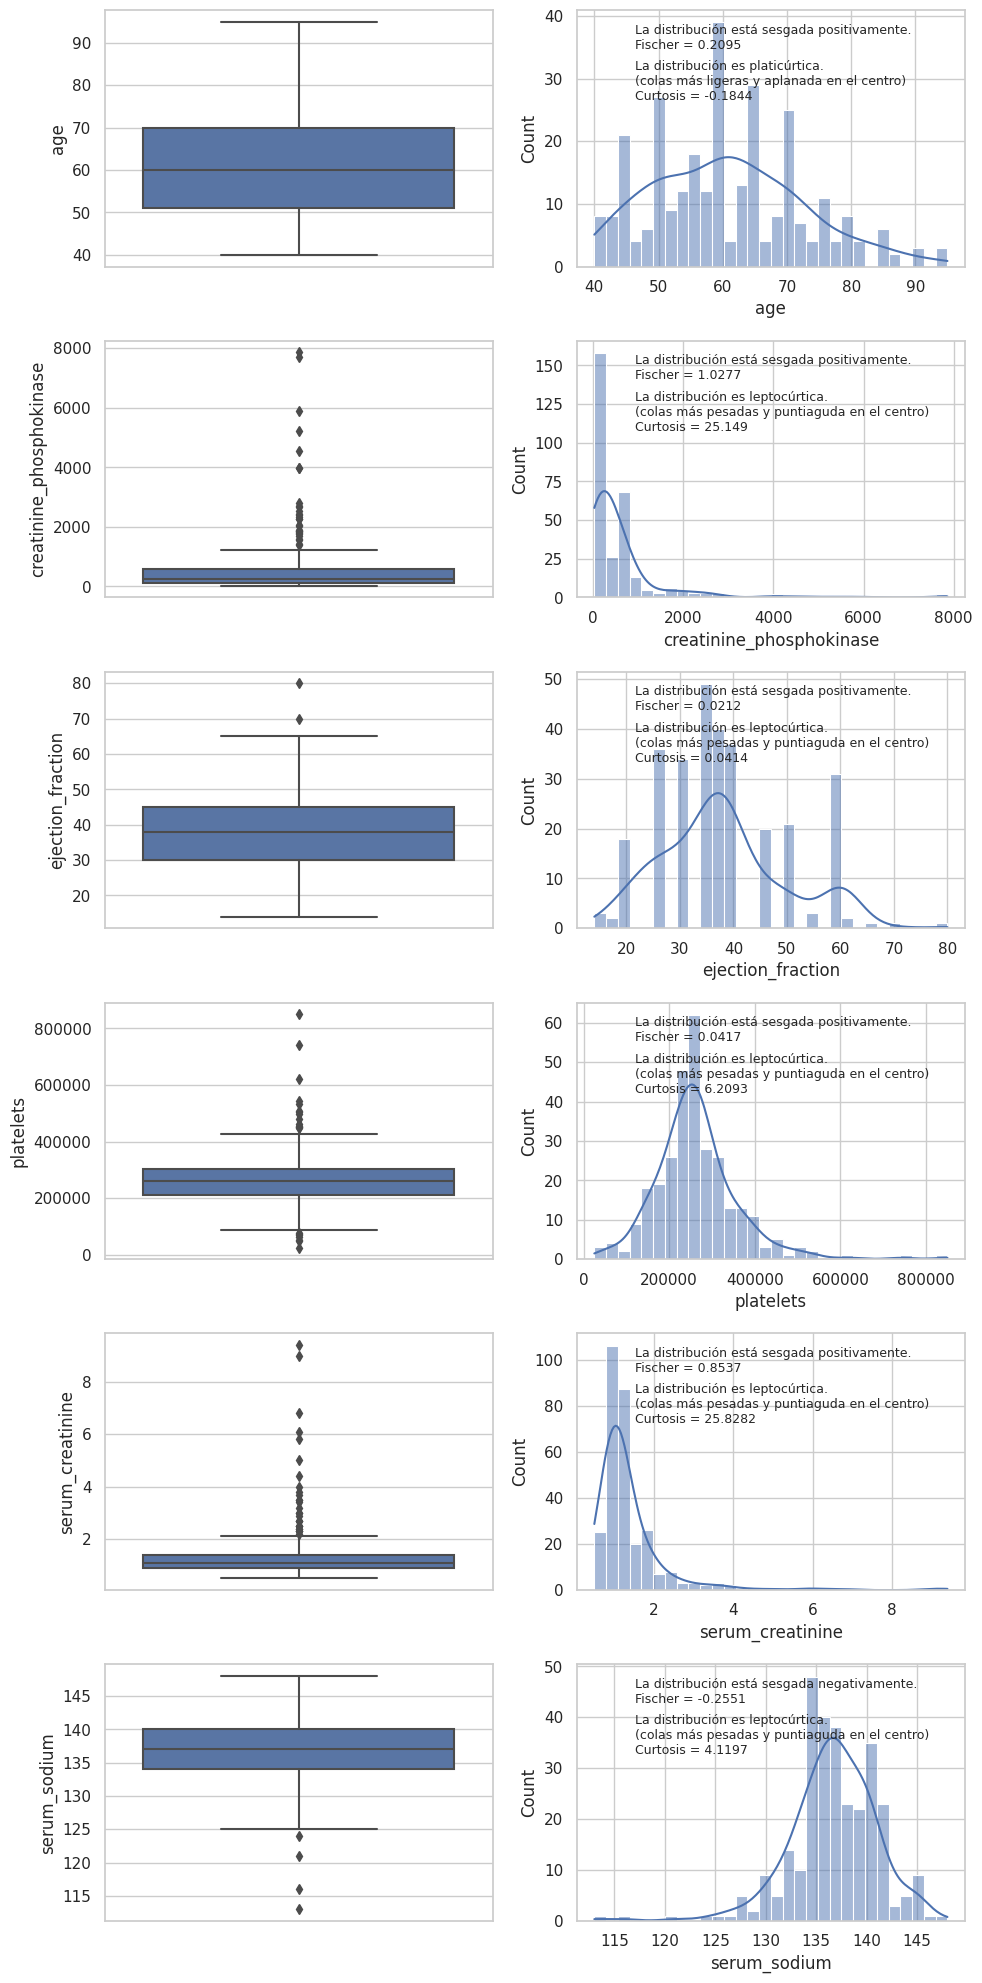

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(6, 2, figsize=(10, 20))

sns.boxplot(y=data['age'], ax=axs[0, 0])
sns.histplot(data['age'], ax=axs[0, 1], bins=30, kde=True)
# kde = estimacion de la grafica de densidad de kernel
# Fisher texto
texto = fisher(media_ed, mediana_ed, desviacion_estandar_ed)
axs[0, 1].text(0.15, 0.85, texto, transform=axs[0, 1].transAxes, fontsize=9)
# Curtosis texto
texto = curtosis(data['age'].kurtosis())
axs[0, 1].text(0.15, 0.65, texto, transform=axs[0, 1].transAxes, fontsize=9)



sns.boxplot(y=data['creatinine_phosphokinase'], ax=axs[1, 0])
sns.histplot(data['creatinine_phosphokinase'], ax=axs[1, 1], bins=30, kde=True)
# Fisher texto
texto = fisher(media_fos, mediana_fos, desviacion_estandar_fos)
axs[1, 1].text(0.15, 0.85, texto, transform=axs[1, 1].transAxes, fontsize=9)
# Curtosis texto
texto = curtosis(data['creatinine_phosphokinase'].kurtosis())
axs[1, 1].text(0.15, 0.65, texto, transform=axs[1, 1].transAxes, fontsize=9)



sns.boxplot(y=data['ejection_fraction'], ax=axs[2, 0])
sns.histplot(data['ejection_fraction'], ax=axs[2, 1], bins=30, kde=True)
# Fisher texto
texto = fisher(media_eye, mediana_eye, desviacion_estandar_eye)
axs[2, 1].text(0.15, 0.85, texto, transform=axs[2, 1].transAxes, fontsize=9)
# Curtosis texto
texto = curtosis(data['ejection_fraction'].kurtosis())
axs[2, 1].text(0.15, 0.65, texto, transform=axs[2, 1].transAxes, fontsize=9)



sns.boxplot(y=data['platelets'], ax=axs[3, 0])
sns.histplot(data['platelets'], ax=axs[3, 1], bins=30, kde=True)
# Fisher texto
texto = fisher(media_pla, mediana_pla, desviacion_estandar_pla)
axs[3, 1].text(0.15, 0.85, texto, transform=axs[3, 1].transAxes, fontsize=9)
# Curtosis texto
texto = curtosis(data['platelets'].kurtosis())
axs[3, 1].text(0.15, 0.65, texto, transform=axs[3, 1].transAxes, fontsize=9)



sns.boxplot(y=data['serum_creatinine'], ax=axs[4, 0])
sns.histplot(data['serum_creatinine'], ax=axs[4, 1], bins=30, kde=True)
# Fisher texto
texto = fisher(media_crea, mediana_crea, desviacion_estandar_crea)
axs[4, 1].text(0.15, 0.85, texto, transform=axs[4, 1].transAxes, fontsize=9)
# Curtosis texto
texto = curtosis(data['serum_creatinine'].kurtosis())
axs[4, 1].text(0.15, 0.65, texto, transform=axs[4, 1].transAxes, fontsize=9)



sns.boxplot(y=data['serum_sodium'], ax=axs[5, 0])
sns.histplot(data['serum_sodium'], ax=axs[5, 1], bins=30, kde=True)
# Fisher texto
texto = fisher(media_so, mediana_so, desviacion_estandar_so)
axs[5, 1].text(0.15, 0.85, texto, transform=axs[5, 1].transAxes, fontsize=9)
# Curtosis texto
texto = curtosis(data['serum_sodium'].kurtosis())
axs[5, 1].text(0.15, 0.65, texto, transform=axs[5, 1].transAxes, fontsize=9)



plt.tight_layout()

plt.show()

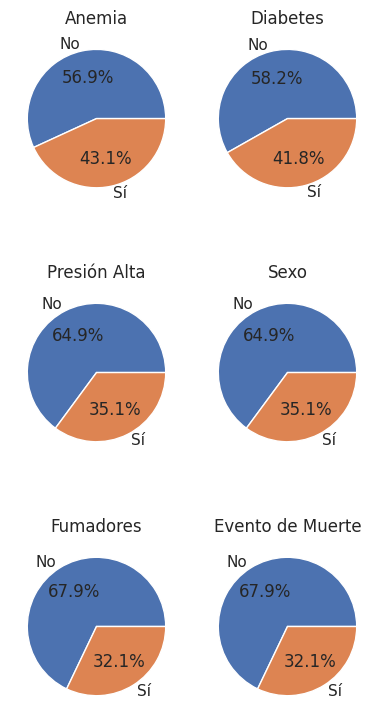

In [ ]:

fig, axs = plt.subplots(3, 2, figsize=(4, 8))

# Gráfico para 'anaemia'
conteo_anemia = original_data['anaemia'].value_counts()
axs[0, 0].pie(conteo_anemia, labels=['No', 'Sí'], autopct='%1.1f%%')
axs[0, 0].set_title('Anemia')

# Gráfico para 'diabetes'
conteo_diabetes = original_data['diabetes'].value_counts()
axs[0, 1].pie(conteo_diabetes, labels=['No', 'Sí'], autopct='%1.1f%%')
axs[0, 1].set_title('Diabetes')

# Gráfico para 'high_blood_pressure'
conteo_presion = original_data['high_blood_pressure'].value_counts()
axs[1, 0].pie(conteo_presion, labels=['No', 'Sí'], autopct='%1.1f%%')
axs[1, 0].set_title('Presión Alta')

# Gráfico para 'sex'
conteo_sexo = original_data['sex'].value_counts()
axs[1, 1].pie(conteo_sexo, labels=['No', 'Sí'], autopct='%1.1f%%')
axs[1, 1].set_title('Sexo')

# Gráfico para 'smoking'
conteo_fumadores = original_data['smoking'].value_counts()
axs[2, 0].pie(conteo_fumadores, labels=['No', 'Sí'], autopct='%1.1f%%')
axs[2, 0].set_title('Fumadores')

# Gráfico para 'DEATH_EVENT'
conteo_muerte = original_data['DEATH_EVENT'].value_counts()
axs[2, 1].pie(conteo_muerte, labels=['No', 'Sí'], autopct='%1.1f%%')
axs[2, 1].set_title('Evento de Muerte')

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

### Eliminacion de datos atipicos

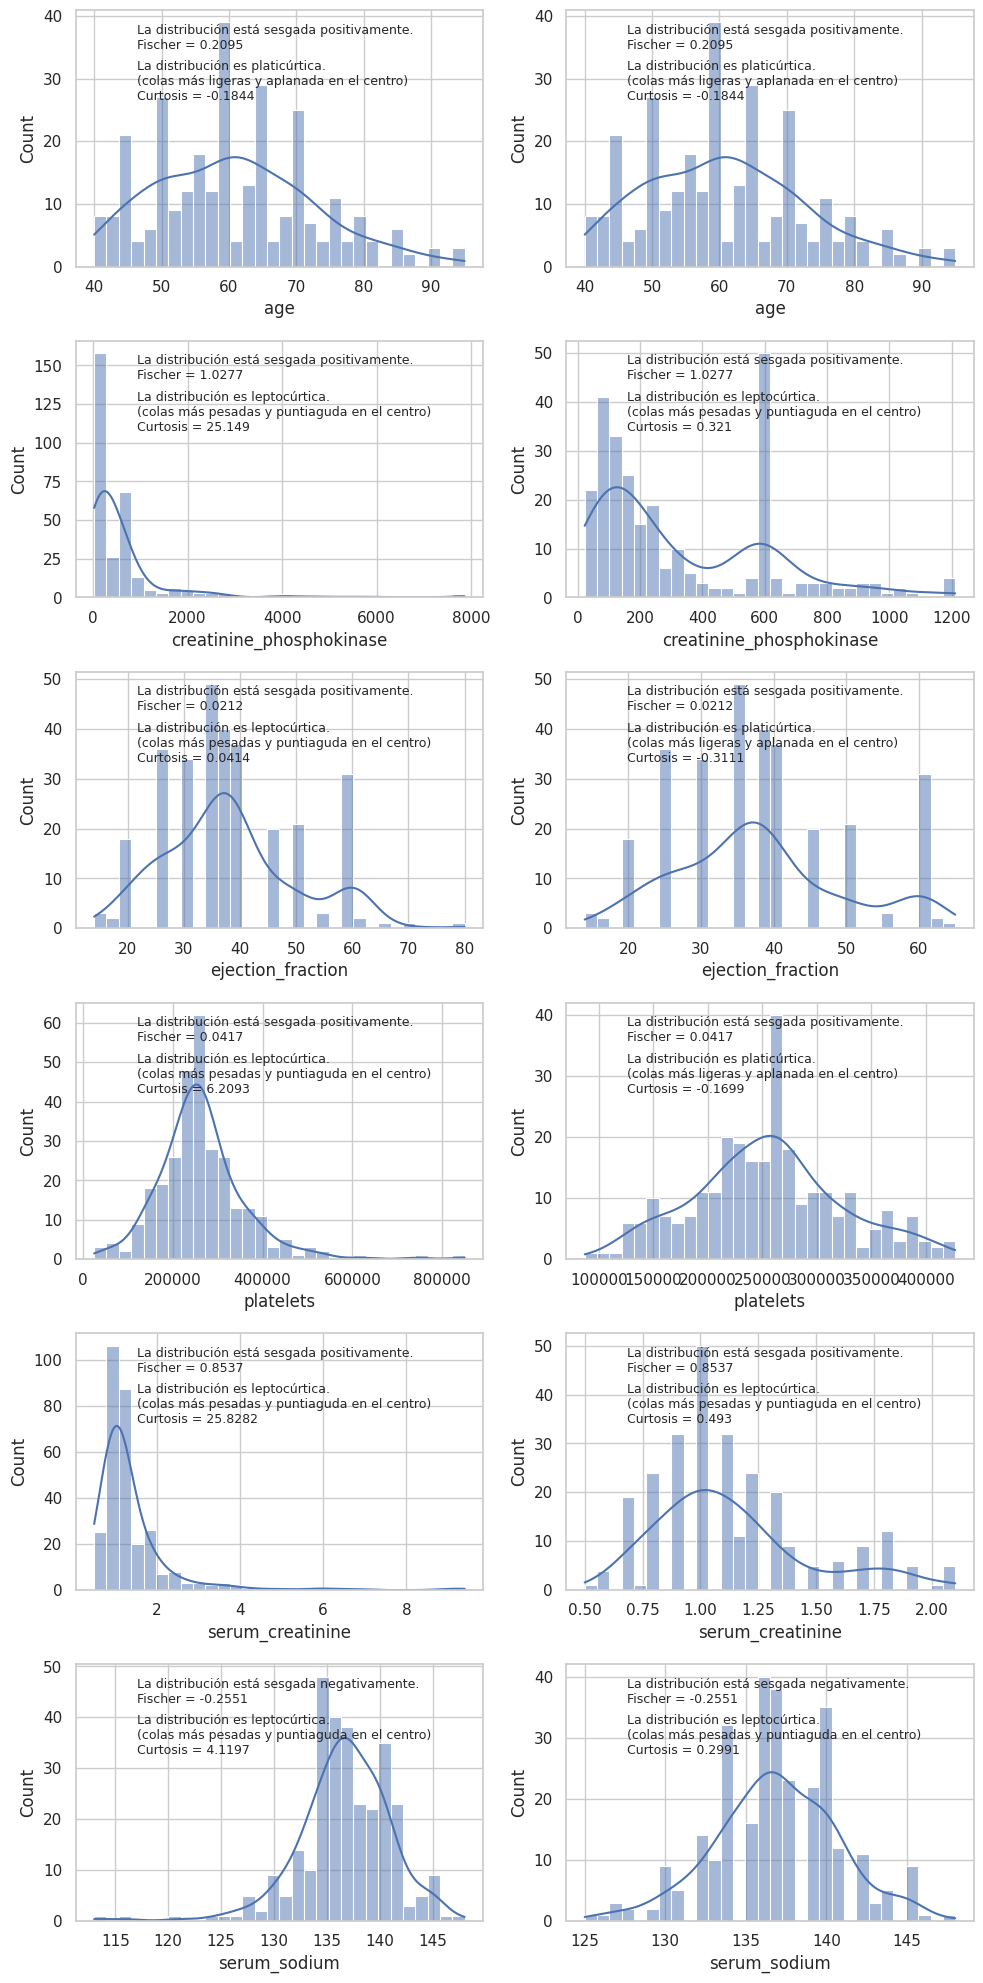

In [ ]:
fig, axs = plt.subplots(6, 2, figsize=(10, 20))

sns.histplot(data['age'], ax=axs[0, 0], bins=30, kde=True)
# kde = estimacion de la grafica de densidad de kernel
# Fisher texto
texto = fisher(media_ed, mediana_ed, desviacion_estandar_ed)
axs[0, 0].text(0.15, 0.85, texto, transform=axs[0, 0].transAxes, fontsize=9)
# Curtosis texto
texto = curtosis(data['age'].kurtosis())
axs[0, 0].text(0.15, 0.65, texto, transform=axs[0, 0].transAxes, fontsize=9)

# ELIMINACION DE DATOS ATIPICOS
data_sin_atipicos_ed = data[(val_min_atipico_ed <= data['age']) & (data['age'] <= val_max_atipico_ed)]

sns.histplot(data_sin_atipicos_ed['age'], ax=axs[0, 1], bins=30, kde=True)
# Fisher texto
texto = fisher(media_ed, mediana_ed, desviacion_estandar_ed)
axs[0, 1].text(0.15, 0.85, texto, transform=axs[0, 1].transAxes, fontsize=9)
# Curtosis texto
texto = curtosis(data_sin_atipicos_ed['age'].kurtosis())
axs[0, 1].text(0.15, 0.65, texto, transform=axs[0, 1].transAxes, fontsize=9)




sns.histplot(data['creatinine_phosphokinase'], ax=axs[1, 0], bins=30, kde=True)
# Fisher texto
texto = fisher(media_fos, mediana_fos, desviacion_estandar_fos)
axs[1, 0].text(0.15, 0.85, texto, transform=axs[1, 0].transAxes, fontsize=9)
# Curtosis texto
texto = curtosis(data['creatinine_phosphokinase'].kurtosis())
axs[1, 0].text(0.15, 0.65, texto, transform=axs[1, 0].transAxes, fontsize=9)

# ELIMINACION DE DATOS ATIPICOS
data_sin_atipicos_fos = data[(val_min_atipico_fos <= data['creatinine_phosphokinase']) & (data['creatinine_phosphokinase'] <= val_max_atipico_fos)]

sns.histplot(data_sin_atipicos_fos['creatinine_phosphokinase'], ax=axs[1, 1], bins=30, kde=True)
# Fisher texto
texto = fisher(media_fos, mediana_fos, desviacion_estandar_fos)
axs[1, 1].text(0.15, 0.85, texto, transform=axs[1, 1].transAxes, fontsize=9)
# Curtosis texto
texto = curtosis(data_sin_atipicos_fos['creatinine_phosphokinase'].kurtosis())
axs[1, 1].text(0.15, 0.65, texto, transform=axs[1, 1].transAxes, fontsize=9)




sns.histplot(data['ejection_fraction'], ax=axs[2, 0], bins=30, kde=True)
# Fisher texto
texto = fisher(media_eye, mediana_eye, desviacion_estandar_eye)
axs[2, 0].text(0.15, 0.85, texto, transform=axs[2, 0].transAxes, fontsize=9)
# Curtosis texto
texto = curtosis(data['ejection_fraction'].kurtosis())
axs[2, 0].text(0.15, 0.65, texto, transform=axs[2, 0].transAxes, fontsize=9)

# ELIMINACION DE DATOS ATIPICOS
data_sin_atipicos_eye = data[(val_min_atipico_eye <= data['ejection_fraction']) & (data['ejection_fraction'] <= val_max_atipico_eye)]

sns.histplot(data_sin_atipicos_eye['ejection_fraction'], ax=axs[2, 1], bins=30, kde=True)
# Fisher texto
texto = fisher(media_eye, mediana_eye, desviacion_estandar_eye)
axs[2, 1].text(0.15, 0.85, texto, transform=axs[2, 1].transAxes, fontsize=9)
# Curtosis texto
texto = curtosis(data_sin_atipicos_eye['ejection_fraction'].kurtosis())
axs[2, 1].text(0.15, 0.65, texto, transform=axs[2, 1].transAxes, fontsize=9)




sns.histplot(data['platelets'], ax=axs[3, 0], bins=30, kde=True)
# Fisher texto
texto = fisher(media_pla, mediana_pla, desviacion_estandar_pla)
axs[3, 0].text(0.15, 0.85, texto, transform=axs[3, 0].transAxes, fontsize=9)
# Curtosis texto
texto = curtosis(data['platelets'].kurtosis())
axs[3, 0].text(0.15, 0.65, texto, transform=axs[3, 0].transAxes, fontsize=9)

# ELIMINACION DE DATOS ATIPICOS
data_sin_atipicos_pla = data[(val_min_atipico_pla <= data['platelets']) & (data['platelets'] <= val_max_atipico_pla)]

sns.histplot(data_sin_atipicos_pla['platelets'], ax=axs[3, 1], bins=30, kde=True)
# Fisher texto
texto = fisher(media_pla, mediana_pla, desviacion_estandar_pla)
axs[3, 1].text(0.15, 0.85, texto, transform=axs[3, 1].transAxes, fontsize=9)
# Curtosis texto
texto = curtosis(data_sin_atipicos_pla['platelets'].kurtosis())
axs[3, 1].text(0.15, 0.65, texto, transform=axs[3, 1].transAxes, fontsize=9)




sns.histplot(data['serum_creatinine'], ax=axs[4, 0], bins=30, kde=True)
# Fisher texto
texto = fisher(media_crea, mediana_crea, desviacion_estandar_crea)
axs[4, 0].text(0.15, 0.85, texto, transform=axs[4, 0].transAxes, fontsize=9)
# Curtosis texto
texto = curtosis(data['serum_creatinine'].kurtosis())
axs[4, 0].text(0.15, 0.65, texto, transform=axs[4, 0].transAxes, fontsize=9)

# ELIMINACION DE DATOS ATIPICOS
data_sin_atipicos_crea = data[(val_min_atipico_crea <= data['serum_creatinine']) & (data['serum_creatinine'] <= val_max_atipico_crea)]

sns.histplot(data_sin_atipicos_crea['serum_creatinine'], ax=axs[4, 1], bins=30, kde=True)
# Fisher texto
texto = fisher(media_crea, mediana_crea, desviacion_estandar_crea)
axs[4, 1].text(0.15, 0.85, texto, transform=axs[4, 1].transAxes, fontsize=9)
# Curtosis texto
texto = curtosis(data_sin_atipicos_crea['serum_creatinine'].kurtosis())
axs[4, 1].text(0.15, 0.65, texto, transform=axs[4, 1].transAxes, fontsize=9)




sns.histplot(data['serum_sodium'], ax=axs[5, 0], bins=30, kde=True)
# Fisher texto
texto = fisher(media_so, mediana_so, desviacion_estandar_so)
axs[5, 0].text(0.15, 0.85, texto, transform=axs[5, 0].transAxes, fontsize=9)
# Curtosis texto
texto = curtosis(data['serum_sodium'].kurtosis())
axs[5, 0].text(0.15, 0.65, texto, transform=axs[5, 0].transAxes, fontsize=9)

# ELIMINACION DE DATOS ATIPICOS
data_sin_atipicos_so = data[(val_min_atipico_so <= data['serum_sodium']) & (data['serum_sodium'] <= val_max_atipico_so)]

sns.histplot(data_sin_atipicos_so['serum_sodium'], ax=axs[5, 1], bins=30, kde=True)
# Fisher texto
texto = fisher(media_so, mediana_so, desviacion_estandar_so)
axs[5, 1].text(0.15, 0.85, texto, transform=axs[5, 1].transAxes, fontsize=9)
# Curtosis texto
texto = curtosis(data_sin_atipicos_so['serum_sodium'].kurtosis())
axs[5, 1].text(0.15, 0.65, texto, transform=axs[5, 1].transAxes, fontsize=9)

plt.tight_layout()

plt.show()

###Analisis de correlacion

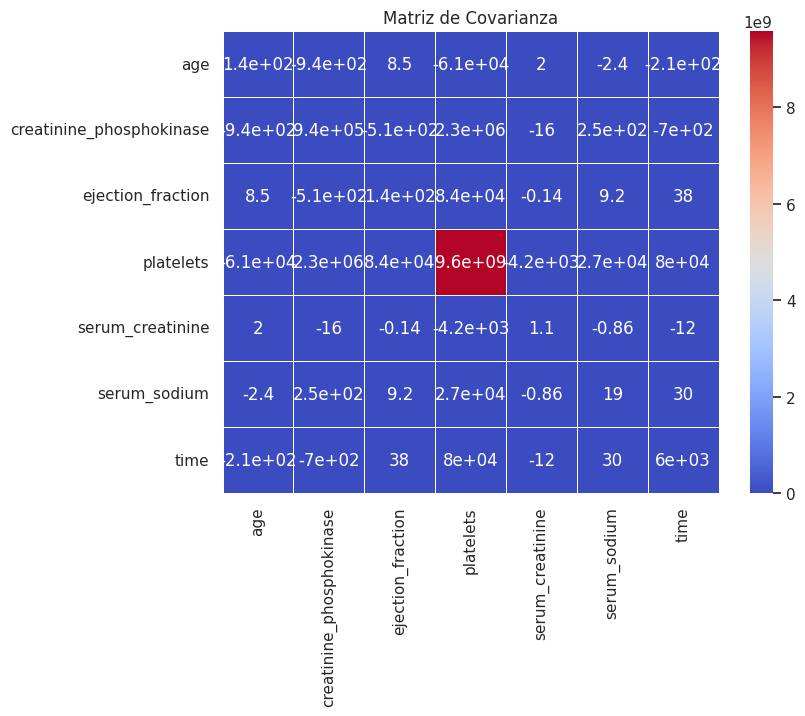

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.cov(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Covarianza')
plt.show()

<ipython-input-216-1f169624a6dd>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_standardized = (data - data.mean()) / data.std()
<ipython-input-216-1f169624a6dd>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_standardized = (data - data.mean()) / data.std()
<ipython-input-216-1f169624a6dd>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matri

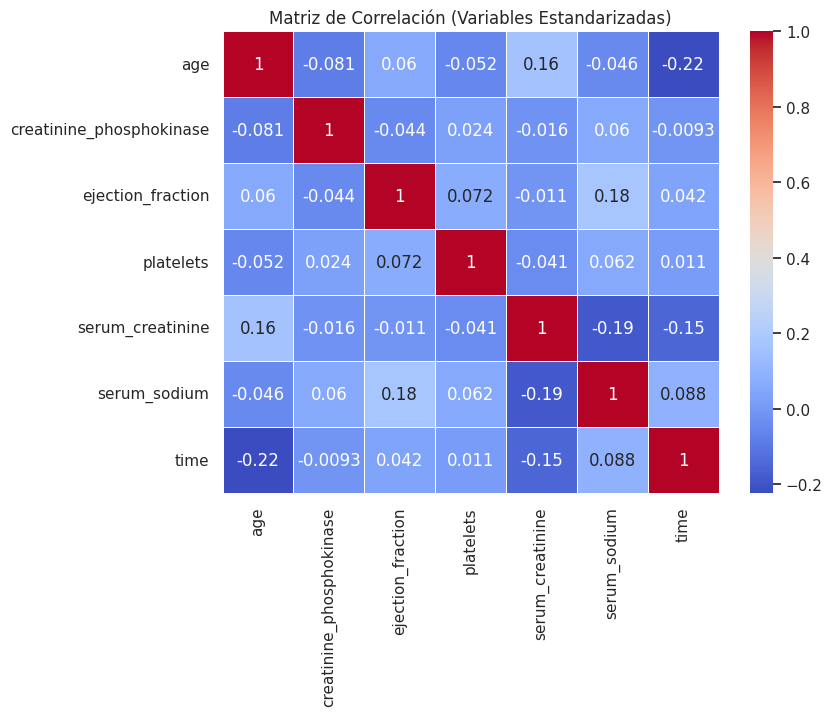

In [ ]:
# Estandarizar las variables
data_standardized = (data - data.mean()) / data.std()

# Calcular la matriz de correlación
corr_matrix = data_standardized.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación (Variables Estandarizadas)')
plt.show()

### Extra

'\nEdades entre 45 y 80 presentan mayor numero de casos.\n'

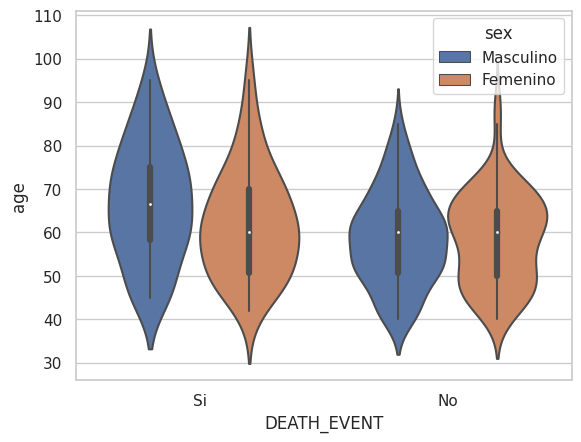

In [ ]:
# Veamos si el genero y la edad influyen en la muerte
sns.violinplot(y=data["age"], x=data["DEATH_EVENT"], hue=data["sex"])
"""

"""

In [ ]:
# Veamos como el genero y la edad influyen en la muerte
sns.violinplot(y=data["age"], x=data["DEATH_EVENT"], hue=data["sex"])
"""
"""

'\nEdades entre 45 y 80 presentan mayor casos de diabetes; el genero femenino\npresenta mas casos al inicio de este rango.\n'

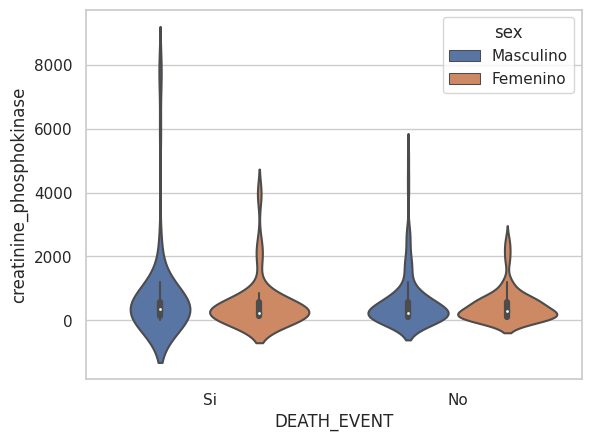

In [ ]:
# veamos como los niveles de creatina fosfoquinasa y el genero influyen en la muerte
sns.violinplot(y=data["creatinine_phosphokinase"], x=data["DEATH_EVENT"], hue=data["sex"])
"""
Graficas similares, no es un factor determinante
"""

'\nGraficas similares\n'

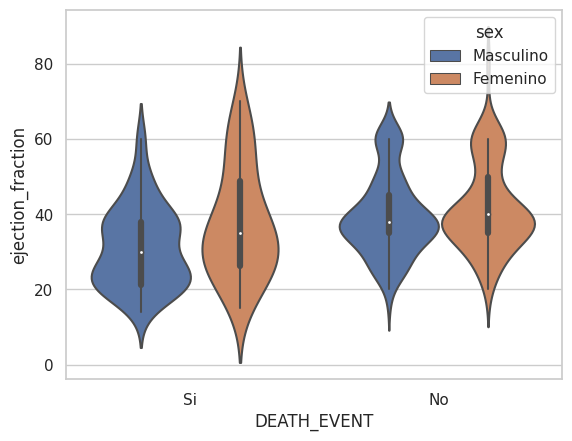

In [ ]:
# veamos como los niveles de fraccion de eyeccion y el genero influyen en la muerte
sns.violinplot(y=data["ejection_fraction"], x=data["DEATH_EVENT"], hue=data["sex"])
"""
Graficas similares
"""

'\nGraficas similares\n'

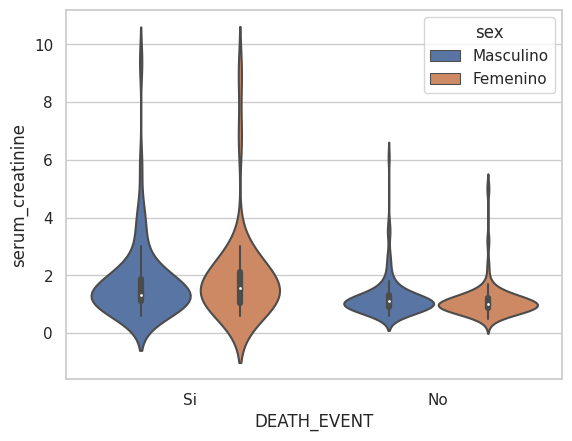

In [ ]:
# veamos como el suero de creatinina de y el genero influyen en la muerte
sns.violinplot(y=data["serum_creatinine"], x=data["DEATH_EVENT"], hue=data["sex"])
"""
Graficas similares
"""

### Conclusiones

1.   La mayoria de los datos presentaban distribuciones muy cercanas a la normal, donde tambien se presentaron muchos valores atipicos.


2.   La eliminacion de los valores atipicos no es una buena estrategia, ya que estos podrian ser un indicador de mortalidad muy importante.


3.   Si bien las tecnicas de analisis utilizadas en este trabajo son muy utiles en el analisis estadistico, no representan una gran fuente de informacion para cumplir con el objetivo de este dataset.


4.   Son los datos relacionales lo que ayudan a esclarecer mejor las condiciones que causan la muerte durante una insuficiencia cardiaca.


5.   Sin embargo, aunque la matriz de correlaciones sea una de estas herramientas mencionadas, no es util ya que no relaciona variables cualitativas con cuantitativas.

### Epilogo

Segun el autor del dataset, se ha demostrado que las inteligencias artificiales son capaces de predecir la mortalidad utilizando los datos de la fraccion de eyeccion y el suero de creatinina.